# TEAM NUMBER 10
## TEAM MEMBERS
##1. DHRUV GOEL(23110098)
##2. NITIN BANSAL(23110223)

In [ ]:
# installing th augly libraray
pip install augly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 52.1 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31528 sha256=bcc707f1dc918d19c6a624769fdb3cd5b34d99b27b15dc88ad45ed19cd9e77ea
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built iopath


In [ ]:
# importing the necessary libraries
import os
import random
import numpy as np
import augly.image as imaugs
from PIL import Image
import matplotlib.pyplot as plt

## TASK 1

In [ ]:
# Defining a function to rotate an image by a random angle between -30 and 30 degree
def rotate_image(img):
    degrees = random.uniform(-30, 30)
    return imaugs.rotate(img, degrees=degrees)


In [ ]:
# Defining a function to randomly crop an image within a certain range
def crop_image(img):
    x1, y1 = random.uniform(0, 0.2), random.uniform(0, 0.2)
    x2, y2 = random.uniform(0.8, 1), random.uniform(0.8, 1)
    return imaugs.crop(img, x1=x1, y1=y1, x2=x2, y2=y2)

In [ ]:
# Defining a function to apply a random blur effect to an image
def blur_image(img):
    radius = random.uniform(0.5, 2.0)
    return imaugs.blur(img, radius=radius)


In [ ]:
# Defining a function to adjust the brightness of an image
def brightness_adjust(img):
    factor = random.uniform(0.5, 1.5)
    return imaugs.brightness(img, factor=factor)  # Corrected function call


In [ ]:
# Defining a function to horizontally flip an image
def horizontal_flip(img):
    return imaugs.hflip(img)  # Corrected function call


In [ ]:
# Defining a function to vertically flip an image
def vertical_flip(img):
    return imaugs.vflip(img)  # Corrected function call


In [ ]:
# Defining a function to apply color jittering to an image
def color_jitter(img):
    return imaugs.color_jitter(img)


In [ ]:
# Defining a function to convert an image to grayscale
def grayscale_image(img):
    return imaugs.grayscale(img)  # Corrected function cal

In [ ]:
# Defining a function to apply a sharpening effect to an image
def sharpen(img):
    return imaugs.sharpen(img)


In [ ]:
# Defining a function to apply a random scaling transformation to an image
def scaling(img):
    scal = random.uniform(0.1, 0.9)
    return imaugs.scale(img, factor=scal)


In [ ]:
# List of augmentation functions
augmentation_functions = [
    rotate_image, crop_image, blur_image, brightness_adjust,
    horizontal_flip, vertical_flip, color_jitter,
    grayscale_image, sharpen, scaling]


In [ ]:
# Custom Augmentation Function
def apply_augmentations(image_path, num_augmentations=3):
   # Opening the image from the given path and convert it to RGB format
    image = Image.open(image_path).convert("RGB")

    # Applying the 3 random augmentations to image
    for _ in range(num_augmentations):
        aug_func = random.choice(augmentation_functions) #Randomly select an augmentation function
        image = aug_func(image)

    return image

In [ ]:
# Mounting google drive for images
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading images
dog_images = [os.path.join("/content/drive/MyDrive/dogs", img) for img in os.listdir("/content/drive/MyDrive/dogs")]
cat_images = [os.path.join("/content/drive/MyDrive/cats", img) for img in os.listdir("/content/drive/MyDrive/cats")]

In [ ]:
# Shuffling images for randomness
random.seed(42)
random.shuffle(dog_images)
random.shuffle(cat_images)

In [ ]:
# Defining train-test (80:20) split
train_ratio = 0.8
test_ratio = 0.2

# Calculating the number of training and testing samples for dogs and cats
num_dogs_train = int(len(dog_images) * train_ratio)
num_cats_train = int(len(cat_images) * train_ratio)
num_dogs_test = int(len(dog_images) * test_ratio)
num_cats_test = int(len(cat_images) * test_ratio)

# Spliting images into train and test sets
# 1 for dog and 0 for cat
train_images = dog_images[:num_dogs_train] + cat_images[:num_cats_train]
train_labels=[1]*num_dogs_train+[0]*num_cats_train # 1 for dog and 0 for cat
test_images = dog_images[num_dogs_train:] + cat_images[num_cats_train:]
test_labels=[1]*num_dogs_test+[0]*num_cats_test  # 1 for dog and 0 for cat

# Converting training images to numpy arrays
train_images_2=[]
for k in train_images:
  img=Image.open(k).convert("RGB")
  img_array = np.array(img)
  train_images_2.append(img_array)

# Converting testing images to numpy arrays
test_images_2=[]
for k in test_images:
  img=Image.open(k).convert("RGB")
  img_array = np.array(img)
  test_images_2.append(img_array)

In [ ]:
# Creating a new list to store the augmented training images as NumPy arrays

new_train_images_2=[]
for k in train_images_2:
  new_train_images_2.append(k)

# List to store augmented images
augmented_images=[]

# Applying augmentations to the training images (first augmentation pass)
for image in train_images:
    augmented_image = apply_augmentations(image,3)
    augmented_images.append(augmented_image)
    img=augmented_image.convert("RGB")
    img_array = np.array(img)
    new_train_images_2.append(img_array)

# Applying augmentations again (second augmentation pass)
for image in train_images:
    augmented_image = apply_augmentations(image,3)
    augmented_images.append(augmented_image)
    img=augmented_image.convert("RGB")
    img_array = np.array(img)
    new_train_images_2.append(img_array)

# Combining original and augmented images into a new training dataset
new_train_images=train_images+augmented_images

# Adjusting labels to match the new dataset size
new_train_label=train_labels*3

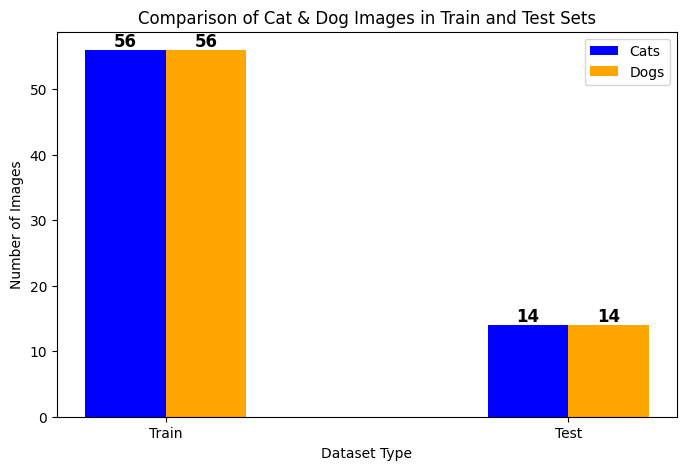

In [ ]:
# Defining dataset categories (Train and Test)
categories_1 = ['Train', 'Test']
dog_count=[num_dogs_train,num_dogs_test]
cat_count=[num_cats_train,num_cats_test]


# Defining the x-axis positions for the bars
x = np.arange(len(categories_1))
width = 0.2  # Width of bars


fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, cat_count, width, label='Cats', color='blue')
bars2 = ax.bar(x + width/2, dog_count, width, label='Dogs', color='orange')

ax.set_xlabel('Dataset Type')
ax.set_ylabel('Number of Images')
ax.set_title('Comparison of Cat & Dog Images in Train and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(categories_1)
ax.legend()

# Adding values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(height),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

In [ ]:
# Initializing counters for augmented dog and cat images in the training set
num_dogs_aug_train=0
num_cats_aug_train=0

# Iterating through the new training labels to count the number of dogs and cats
for k in new_train_label:
  if k==1:
    num_dogs_aug_train+=1
  else:
    num_cats_aug_train+=1

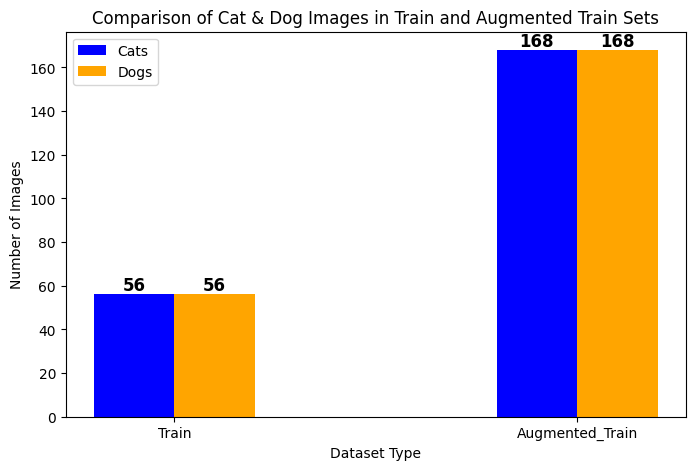

In [ ]:
# Data categories
categories_2 = ['Train', 'Augmented_Train']
dog_count_2=[num_dogs_train,num_dogs_aug_train]
cat_count_2=[num_cats_train,num_cats_aug_train]

x = np.arange(len(categories_2))
width = 0.2  # Width of bars

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, cat_count_2, width, label='Cats', color='blue')
bars2 = ax.bar(x + width/2, dog_count_2, width, label='Dogs', color='orange')

ax.set_xlabel('Dataset Type')
ax.set_ylabel('Number of Images')
ax.set_title('Comparison of Cat & Dog Images in Train and Augmented Train Sets')
ax.set_xticks(x)
ax.set_xticklabels(categories_2)
ax.legend()

# Adding values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(height),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

Printing some augmented images

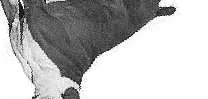

In [ ]:
augmented_images[5]

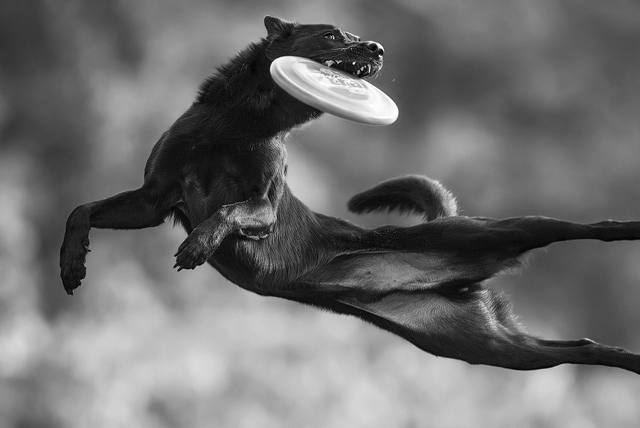

In [ ]:
augmented_images[11]

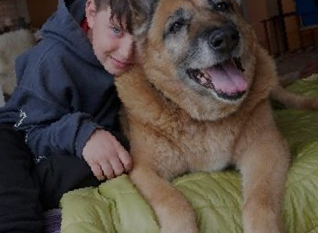

In [ ]:
augmented_images[16]

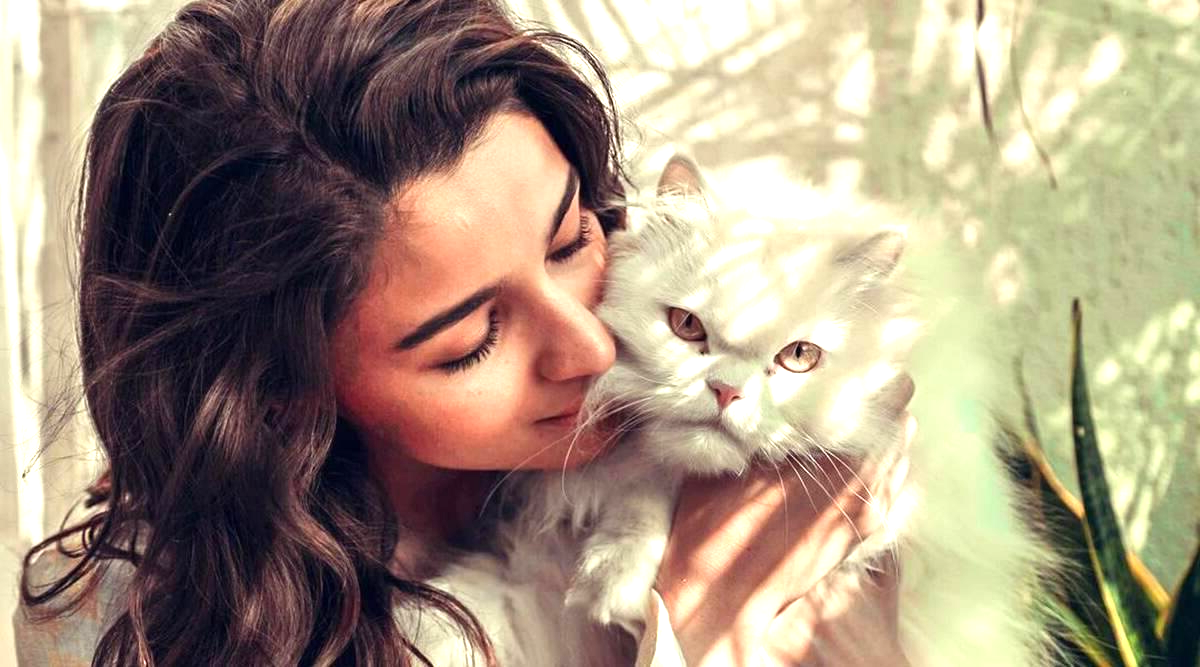

In [ ]:
augmented_images[71]

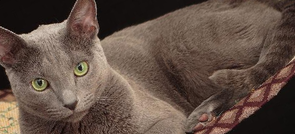

In [ ]:
augmented_images[80]

## TASK 2

importing required modules

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from transformers import AutoModel

In [ ]:
# Customizing the pre trained model
# Modifing the model to include a classification head
class CustomResNet(nn.Module):
    def __init__(self, base_model, num_classes=2):
        super(CustomResNet, self).__init__()
        self.base_model = base_model
        self.pool = nn.AdaptiveAvgPool2d((1, 1))  # Pooling to get correct shape
        self.fc = nn.Linear(2048, num_classes)  # ResNet-50 feature size is 2048

    def forward(self, x):
        features = self.base_model(x).last_hidden_state  # Extracting features from the base model
        features = self.pool(features)  # Applying Adaptive Pooling
        features = torch.flatten(features, start_dim=1)
        return self.fc(features)  # Passing through fully connected (FC) layer for classifaction

In [ ]:
# Setting device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loading pre-trained ResNet-50 from Hugging Face
base_model = AutoModel.from_pretrained("microsoft/resnet-50")

# Function to initialize new weights
def initialize_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        torch.nn.init.kaiming_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)

num_classes = 2
model = CustomResNet(base_model, num_classes).to(device)

# Applying weight initialization
model.apply(initialize_weights)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

CustomResNet(
  (base_model): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64, 64, kernel

Architecture Diagram
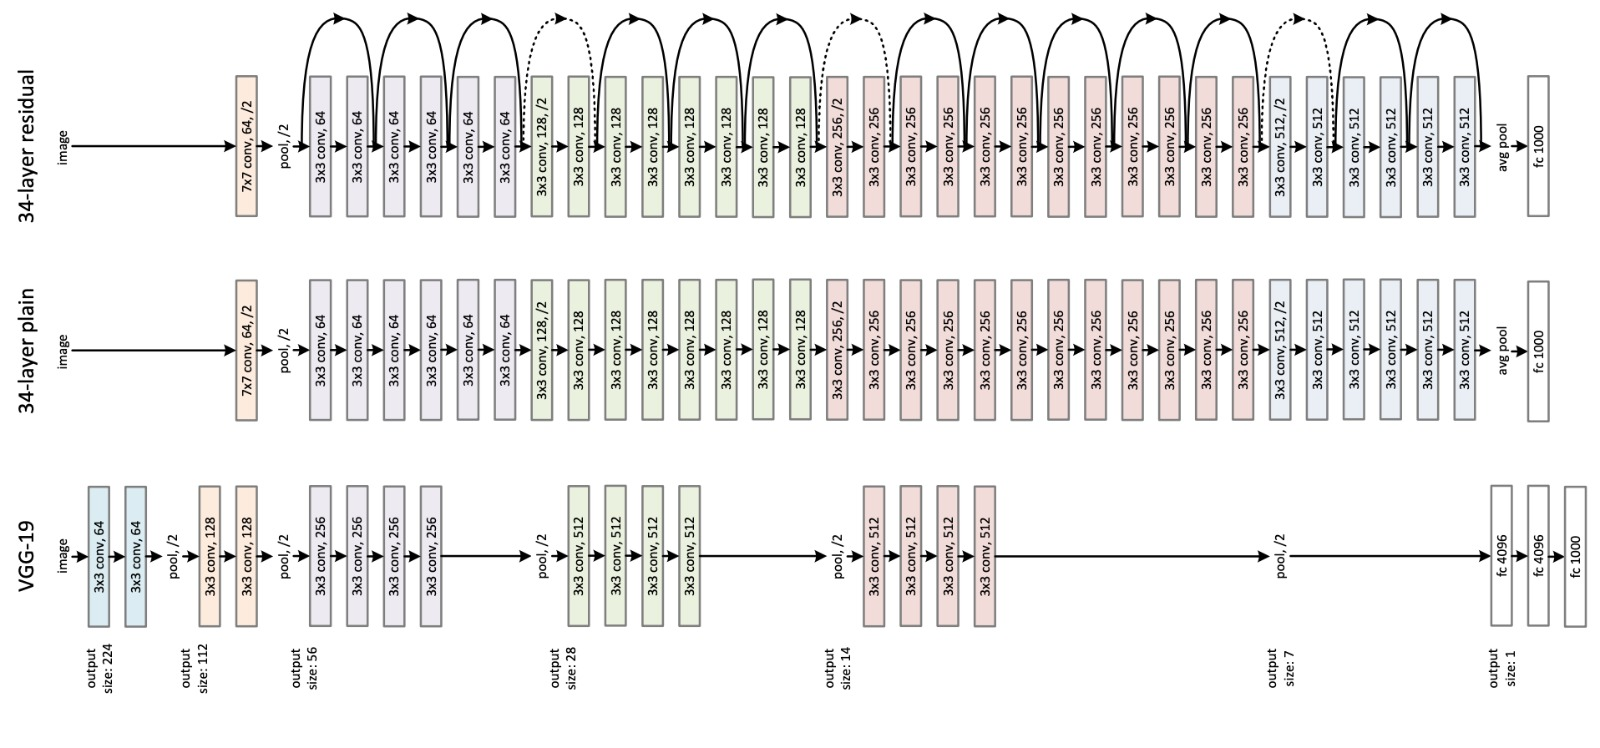

In [ ]:
# Converting train_images_2 to a NumPy array with consistent shape
# Initializing an empty list to store processed images
# Preprocessing the data to make it compatible for resnet-50 model
processed_images = []
for img in train_images_2:
    if isinstance(img, np.ndarray):
        img_resized = Image.fromarray(img).resize((224, 224))  # Ensureing correct size
    else:
        img_resized = img.resize((224, 224)) # Ensureing correct size

    img_array = np.array(img_resized)  # Converting the resized image back to a NumPy array

    # Ensuring it's (3, 224, 224) by adding missing channels if necessary
    if len(img_array.shape) == 2:  # Grayscale case
        img_array = np.stack([img_array] * 3, axis=0)  # Convert to 3-channel
    elif img_array.shape[-1] == 3:  # If shape is (224, 224, 3), convert to (3, 224, 224)
        img_array = img_array.transpose(2, 0, 1)  # Change channel order

    processed_images.append(img_array)

# Converting the list of images to a PyTorch tensor
train_images = torch.tensor(np.array(processed_images), dtype=torch.float32)
train_labels = torch.tensor(np.array(train_labels), dtype=torch.long)

# Defining transformations for images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize and setting mean and standard deviation
])

# Applying transformations to each image (normalization)
train_images = torch.stack([transform(img) for img in train_images])

In [ ]:
# Creating dataset and DataLoader for training model
train_dataset = TensorDataset(train_images, train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss() # Cross-entropy loss for multi-class classification

optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam optimizer with a learning rate of 0.001

In [ ]:
# Training function
def train_model(model, train_loader, num_epochs=5):
    model.train() # Set the model to training mode
    for epoch in range(num_epochs):
        total_loss = 0
        # Iterating over batches in DataLoader
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad() # Reset gradients before the backward pass
            outputs = model(inputs)   # Forward pass: getting model predictions (logits)
            loss = criterion(outputs, labels) # Computing loss using CrossEntropyLoss
            loss.backward() # Backpropagation: computing gradients
            optimizer.step() # Updating model weights using optimizer
            total_loss += loss.item()
   # Printing average loss per epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")

    return model

# Train the model without augmentation
print("Training model WITHOUT augmentation...")
model_no_aug = train_model(model, train_loader)
torch.save(model_no_aug.state_dict(), 'model_without_augmentation.pth')

Training model WITHOUT augmentation...
Epoch 1/5, Loss: 2.2811
Epoch 2/5, Loss: 0.7420
Epoch 3/5, Loss: 0.7361
Epoch 4/5, Loss: 0.7956
Epoch 5/5, Loss: 0.6964


In [ ]:
# Converting augmented train images to a NumPy array with consistent shape
# Preprocessing the data to make it compatible for resnet-50 model
processed_images = []
for img in new_train_images_2:
    if isinstance(img, np.ndarray):  # If it's already a NumPy array
        img_resized = Image.fromarray(img).resize((224, 224))  # Ensuring correct size
    else:  # If it's a PIL Image
        img_resized = img.resize((224, 224))

    img_array = np.array(img_resized)  # Converting to NumPy array

    # Ensuring it's (3, 224, 224) by adding missing channels if necessary
    if len(img_array.shape) == 2:  # Grayscale case
        img_array = np.stack([img_array] * 3, axis=0)  # Converting to 3-channel
    elif img_array.shape[-1] == 3:  # If shape is (224, 224, 3), convert to (3, 224, 224)
        img_array = img_array.transpose(2, 0, 1)  # Changeing channel order

    processed_images.append(img_array)

# Converting augmented training data to PyTorch tensors
aug_train_images = torch.tensor(np.array(processed_images), dtype=torch.float32)
aug_train_labels = torch.tensor(np.array(new_train_label), dtype=torch.long)

# Defining transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizing
])

# Applying transformations (Manually transform images one by one)
aug_train_images = torch.stack([transform(img) for img in aug_train_images])

In [ ]:
# Creating dataset and DataLoader for augmented training data
aug_train_dataset = TensorDataset(aug_train_images, aug_train_labels)
aug_train_loader = DataLoader(aug_train_dataset, batch_size=32, shuffle=True)

# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training function
def train_model(model, train_loader, num_epochs=5):
    model.train() # Setting the model to training mode
    for epoch in range(num_epochs):
        total_loss = 0
          for inputs, labels in train_loader:  # Iterating over batches in DataLoader
            inputs, labels = inputs.to(device), labels.to(device)  # Moving data to GPU if available

            optimizer.zero_grad()  # Reseting gradients before the backward pass
            outputs = model(inputs)  # Forward pass: getting model predictions (logits)
            loss = criterion(outputs, labels)  # Computing loss using CrossEntropyLoss
            loss.backward()  # Backpropagation: computing gradients
            optimizer.step()  # Updating model weights using optimizer

            total_loss += loss.item()  # Accumulateing batch loss

        # Printing average loss per epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")

    return model  # Return the trained model

# Train the model without augmentation
print("Training model WITH augmentation...")
model_aug = train_model(model, aug_train_loader)
torch.save(model_aug.state_dict(), 'model_with_augmentation.pth')

Training model WITH augmentation...
Epoch 1/5, Loss: 0.9389
Epoch 2/5, Loss: 0.9052
Epoch 3/5, Loss: 0.7600
Epoch 4/5, Loss: 0.7172
Epoch 5/5, Loss: 0.7518


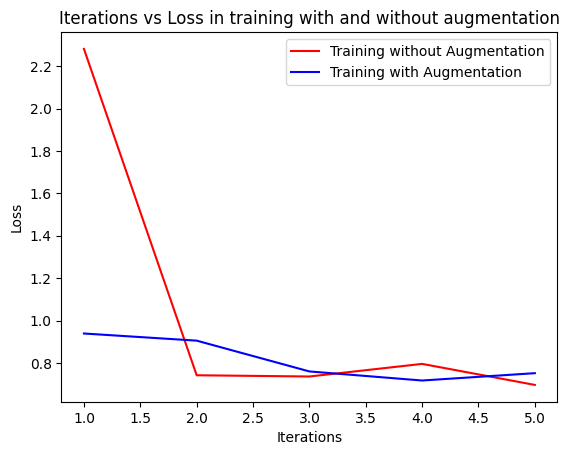

In [ ]:
# Showing graph for loss in training
iteration=[1,2,3,4,5]
loss_1=[2.2811,0.7420,0.7361,0.7956,0.6964]
loss_2=[0.9389,0.9052,0.7600,0.7172,0.7518]

import matplotlib.pyplot as plt

plt.plot(iteration,loss_1,color="red",label="Training without Augmentation")
plt.plot(iteration,loss_2,color="blue",label="Training with Augmentation")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Iterations vs Loss in training with and without augmentation")
plt.legend()
plt.show()

In [ ]:
# Importing neccesary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Function to evaluate the trained model on the test dataset
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []  # List to store predicted labels
    all_labels = []  # List to store actual labels


    with torch.no_grad():  # Disabling gradient computation for efficiency
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())  # Storing predictions in a list
            all_labels.extend(labels.cpu().numpy())  # Storing actual labels in a list

    # Computing evaluation metrics
    accuracy = accuracy_score(all_labels, all_preds)  # Computing accuracy
    precision = precision_score(all_labels, all_preds, average='weighted')  # Computing precision
    recall = recall_score(all_labels, all_preds, average='weighted')  # Computing recall
    f1 = f1_score(all_labels, all_preds, average='weighted')  # Computing F1-score

    return accuracy, precision, recall, f1

In [ ]:
# Converting train_images_2 to a NumPy array with consistent shape
processed_images = []
for img in test_images_2:
    if isinstance(img, np.ndarray):  # If it's already a NumPy array
        img_resized = Image.fromarray(img).resize((224, 224))  # Ensuring correct size
    else:  # If it's a PIL Image
        img_resized = img.resize((224, 224))

    img_array = np.array(img_resized)  # Converting to NumPy array

    # Ensuring it's (3, 224, 224) by adding missing channels if necessary
    if len(img_array.shape) == 2:  # Grayscale case
        img_array = np.stack([img_array] * 3, axis=0)  # Converting to 3-channel
    elif img_array.shape[-1] == 3:  # If shape is (224, 224, 3), convert to (3, 224, 224)
        img_array = img_array.transpose(2, 0, 1)  # Change channel order

    processed_images.append(img_array)

# Converting to PyTorch tensors
test_images = torch.tensor(np.array(processed_images), dtype=torch.float32)
test_labels = torch.tensor(np.array(test_labels), dtype=torch.long)

# Defining transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizing
])

# Applying transformations (Manually transform images one by one)
test_images = torch.stack([transform(img) for img in test_images])

In [ ]:
# Creating dataset and DataLoader
test_dataset = TensorDataset(test_images, test_labels)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
# Evaluating model without augmentation
model.load_state_dict(torch.load('model_without_augmentation.pth'))
# Evaluating the model's performance on the test dataset
accuracy_no_aug, precision_no_aug, recall_no_aug, f1_no_aug = evaluate_model(model, test_loader)

print("Model without augmentation:")
print(f"Accuracy: {accuracy_no_aug:.4f}")
print(f"Precision: {precision_no_aug:.4f}")
print(f"Recall: {recall_no_aug:.4f}")
print(f"F1 Score: {f1_no_aug:.4f}")

<ipython-input-49-c90cfc56395f>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_without_augmentation.pth'))


Model without augmentation:
Accuracy: 0.5000
Precision: 0.2500
Recall: 0.5000
F1 Score: 0.3333


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Evaluate model with augmentation
model.load_state_dict(torch.load('model_with_augmentation.pth'))
# Evaluating the model's performance on the test dataset
accuracy_aug, precision_aug, recall_aug, f1_aug = evaluate_model(model, test_loader)

print("\nModel with augmentation:")
print(f"Accuracy: {accuracy_aug:.4f}")
print(f"Precision: {precision_aug:.4f}")
print(f"Recall: {recall_aug:.4f}")
print(f"F1 Score: {f1_aug:.4f}")

<ipython-input-50-1e65dd273a17>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_augmentation.pth'))



Model with augmentation:
Accuracy: 0.5357
Precision: 0.5933
Recall: 0.5357
F1 Score: 0.4510


The model is not giving good results in both training without augmentation and with augmentation there can be many cases: \\
1. The train dataset is not sufficient for training the model.
2. The augmentation was not done properly.
3. The augmentation has changed the image alot.
4. The model ran on very less number of iterations.
5. Not good initialization of the weights in the model.